In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier   

classifier = KNeighborsClassifier(n_neighbors=5)

**<font size=5 face=雅黑>knn介紹</font>**

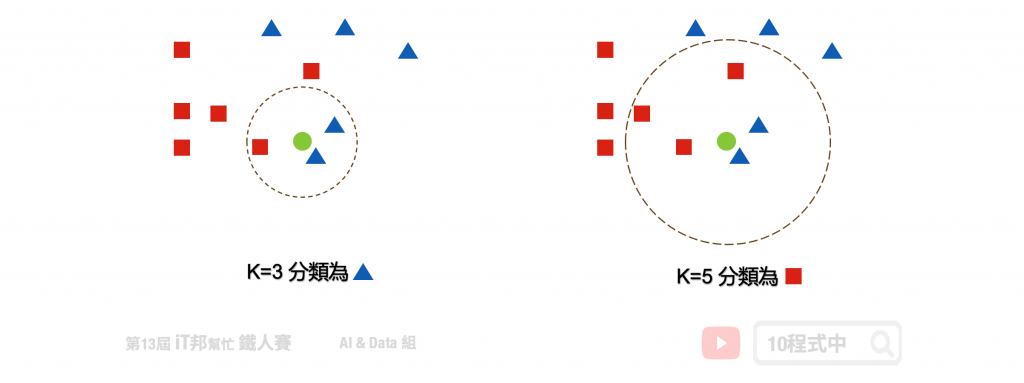

In [ ]:
特色:
    決定k值，k的大小將會決定你附近有多少鄰居，而之後求每個鄰居與自己的距離
    ，最終找出與自己最近的k個鄰居，哪組鄰居數量最多加入哪組。    

**<font size=5 face=雅黑>knn回歸</font>**

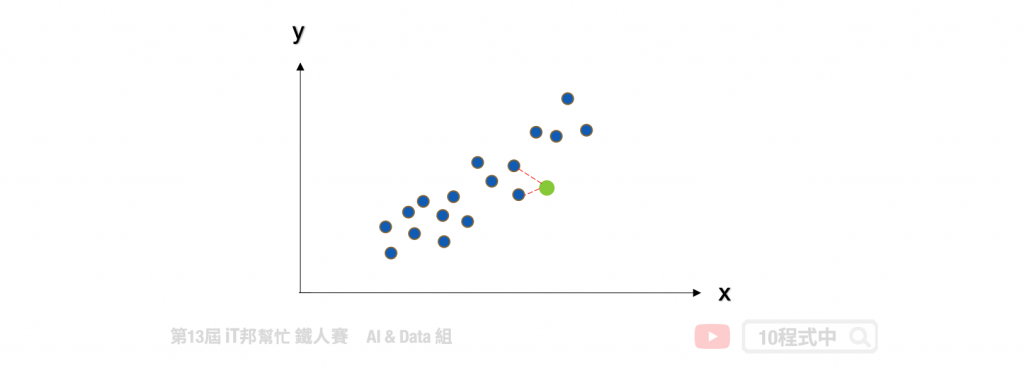

In [ ]:
KNN 同時也能運用在迴歸問題上面。迴歸模型輸出的結果是一個連續性數值，
其預測該值是 k 個最近鄰居輸出的平均值。以下圖為例當 k=2 時，
假設我們有一個輸入特徵 x 要預測的輸出為 y。當有一筆新的 x 進來的時候， 
KNN 迴歸器會尋找鄰近 2 個 x 的輸出做平均當作是該筆資料的預測結果y。

In [ ]:
**<font size=5 face=雅黑>knn與k-means差別</font>**

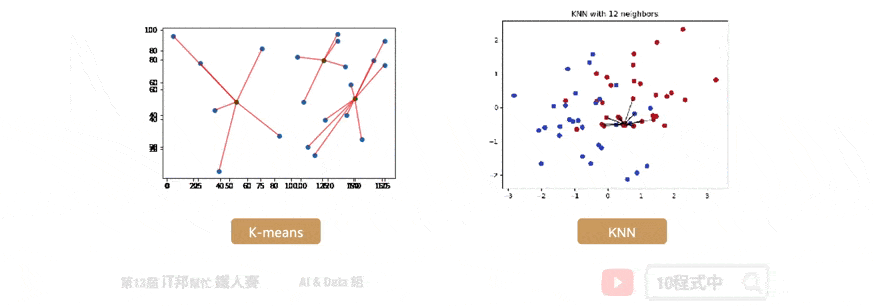

In [ ]:
KNN 的缺點是對資料的局部結構非常敏感，因此調整適當的 k 值極為重要。
另外大家很常將 KNN 與 K-means 混淆，雖然兩者都有 k 值要設定但其實兩者無任何關聯。
KNN 的 k 是設定鄰居的數量採多數決作為輸出的依據。
而 K-means 的 k 是設定集群的類別中心點數量。

**<font size=5 face=雅黑>銀行客戶流失預測實作</font>**

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#----------------------------------------------------------------------------------------------------資料前處理
train_x = train[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
Std = StandardScaler()
train_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = Std.fit_transform(train_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]) #標準化
train_x[['HasCrCard','IsActiveMember']] = train_x[['HasCrCard','IsActiveMember']].astype(str)
train_x_dummies = pd.get_dummies(train_x) 
train_y = train['Exited']
#------------------------------------------------------------------------------------------------------------------------------
test_x = test[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
test_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = Std.fit_transform(test_x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]) #標準化
test_x[['HasCrCard','IsActiveMember']] = test_x[['HasCrCard','IsActiveMember']].astype(str)
test_x_dummies = pd.get_dummies(test_x)
dummy = test_x_dummies.columns.tolist() 

NameError: name 'pd' is not defined

In [3]:
classifier.fit(train_x_dummies, train_y )
pred_y = classifier.predict(test_x_dummies)
pred_y = (pred_y > 0.5)
final = {"RowNumber": test["RowNumber"],'Exited':pred_y}
final_df = pd.DataFrame(final)
final_df.to_csv('final.csv')